# Kode

In [15]:
# STEP 0: Import libraries
!pip install -q scikit-image

import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage.feature import local_binary_pattern
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
!git clone https://github.com/rafiadabhi/STA1381-PSD.git

plt.rcParams['figure.figsize'] = (12, 4)

Cloning into 'STA1381-PSD'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 30 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (30/30), 5.98 MiB | 23.92 MiB/s, done.
Resolving deltas: 100% (5/5), done.


Kode di atas menginstal dan mengimpor semua library yang dibutuhkan untuk pemrosesan citra, ekstraksi fitur, visualisasi, dan klasifikasi. Selain itu, kode juga melakukan *clone* repositori GitHub sebagai *working directory* tempat data gambar diambil, serta mengatur ukuran default tampilan plot agar lebih lebar.



=== CAT ===
Path: /content/STA1381-PSD/SESI UAS/image-data/cat.jfif
Shape (H, W, C): (183, 275, 3)
Sample 3x3 pixels (RGB):
[[[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]]


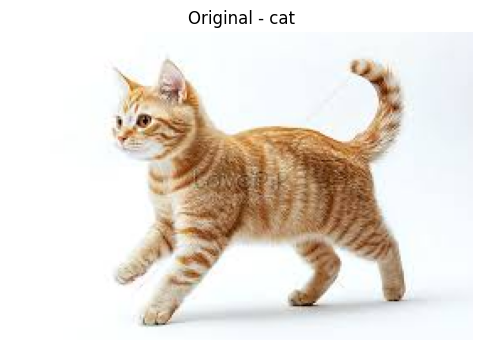


=== BANANA ===
Path: /content/STA1381-PSD/SESI UAS/image-data/banana.jfif
Shape (H, W, C): (198, 255, 3)
Sample 3x3 pixels (RGB):
[[[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]]


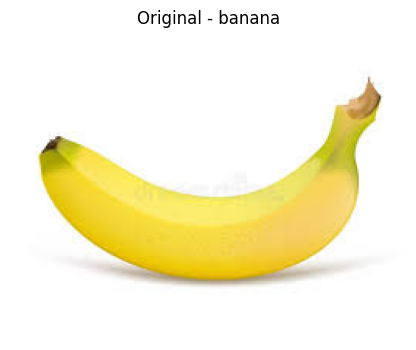


=== BATIK ===
Path: /content/STA1381-PSD/SESI UAS/image-data/batik.jfif
Shape (H, W, C): (225, 225, 3)
Sample 3x3 pixels (RGB):
[[[132 104 100]
  [129  91  90]
  [113  54  60]]

 [[ 92  50  52]
  [140  90  93]
  [122  56  66]]

 [[151  80  94]
  [171  97 110]
  [125  44  61]]]


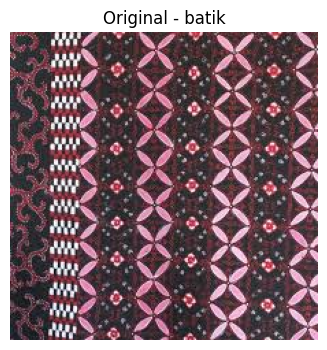


=== ORANGE ===
Path: /content/STA1381-PSD/SESI UAS/image-data/orange.jpeg
Shape (H, W, C): (219, 230, 3)
Sample 3x3 pixels (RGB):
[[[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]]


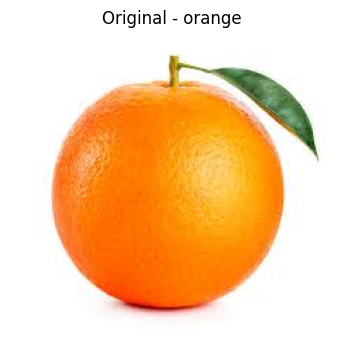


=== RABBIT ===
Path: /content/STA1381-PSD/SESI UAS/image-data/rabbit.webp
Shape (H, W, C): (784, 719, 3)
Sample 3x3 pixels (RGB):
[[[238 238 238]
  [238 238 238]
  [238 238 238]]

 [[238 238 238]
  [238 238 238]
  [238 238 238]]

 [[238 238 238]
  [238 238 238]
  [238 238 238]]]


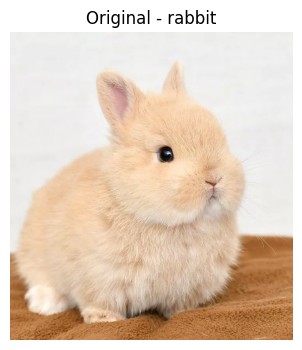

In [34]:
# STEP 1: Load images & basic info

base_path = "/content/STA1381-PSD/SESI UAS/image-data/"

image_files = {
    "cat":   "cat.jfif",
    "banana": "banana.jfif",
    "batik": "batik.jfif",
    "orange": "orange.jpeg",
    "rabbit": "rabbit.webp"
}

images_rgb = {}

for label, fname in image_files.items():
    path = base_path + fname
    img_bgr = cv2.imread(path)
    if img_bgr is None:
        print(f"[ERROR] Gambar {fname} tidak ditemukan.")
        continue

    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    images_rgb[label] = img_rgb

    print(f"\n=== {label.upper()} ===")
    print("Path:", path)
    print("Shape (H, W, C):", img_rgb.shape)
    print("Sample 3x3 pixels (RGB):")
    print(img_rgb[:3, :3, :])  # contoh kecil

    plt.imshow(img_rgb)
    plt.title(f"Original - {label}")
    plt.axis('off')
    plt.show()

Kode di atas membaca seluruh file gambar dari folder image-data berdasarkan daftar nama file yang sudah ditentukan. Setiap gambar di-load dengan OpenCV, dikonversi dari format BGR ke RGB, lalu disimpan ke dalam dictionary untuk proses berikutnya. Selain itu, kode juga menampilkan informasi dasar setiap gambar seperti path, ukuran (height–width–channel), contoh nilai pixel, serta menampilkan visualisasi gambar aslinya menggunakan Matplotlib.

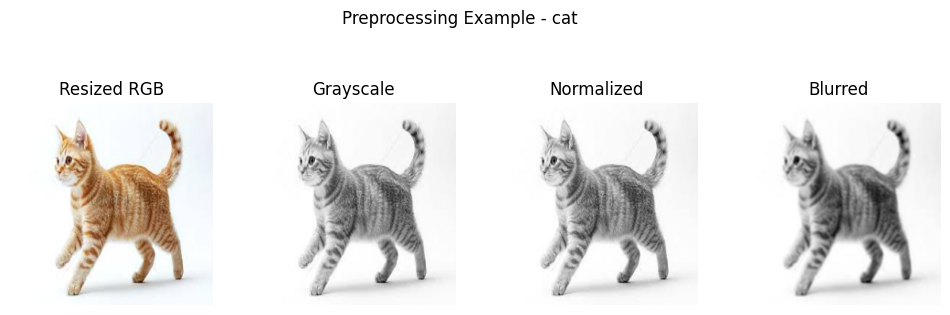

In [35]:
# STEP 2: Preprocessing function

def preprocess_image(img_rgb, size=(256, 256)):
    # Resize
    img_resized = cv2.resize(img_rgb, size)
    # Grayscale
    gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)
    # Normalization 0-1
    norm = gray / 255.0
    # Smoothing / Noise reduction (Gaussian Blur)
    blur = cv2.GaussianBlur(norm, (5, 5), 0)

    return {
        "resized_rgb": img_resized,
        "gray": gray,
        "norm": norm,
        "blur": blur
    }

# Demo untuk satu gambar (misalnya kucing)
sample_label = "cat"
prep = preprocess_image(images_rgb[sample_label])

plt.figure(figsize=(12,4))
titles = ["Resized RGB", "Grayscale", "Normalized", "Blurred"]
imgs = [prep["resized_rgb"], prep["gray"], prep["norm"], prep["blur"]]

for i in range(4):
    plt.subplot(1,4,i+1)
    if i == 0:
        plt.imshow(imgs[i])
    else:
        plt.imshow(imgs[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.suptitle(f"Preprocessing Example - {sample_label}")
plt.show()

Kode di atas membuat fungsi preprocessing untuk setiap citra, yang mencakup proses *resize*, konversi ke grayscale, normalisasi intensitas piksel, serta peredaman noise menggunakan Gaussian Blur. Hasil preprocessing untuk gambar contoh (kucing) kemudian ditampilkan dalam empat tahap: versi yang telah di-*resize*, grayscale, dinormalisasi, dan yang telah melalui proses *blurring*. Hal ini dilakukan untuk memastikan bahwa gambar berada dalam format yang konsisten dan bersih sebelum diekstraksi fiturnya atau digunakan dalam model klasifikasi.


=== CAT ===
Path: /content/STA1381-PSD/SESI UAS/image-data/cat.jfif
Shape: (183, 275, 3)
Sample pixel matrix:
[[[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]]


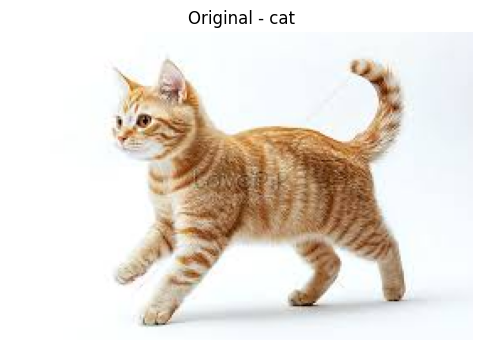


=== BANANA ===
Path: /content/STA1381-PSD/SESI UAS/image-data/banana.jfif
Shape: (198, 255, 3)
Sample pixel matrix:
[[[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]]


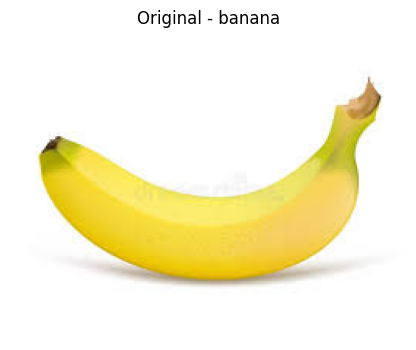


=== BATIK ===
Path: /content/STA1381-PSD/SESI UAS/image-data/batik.jfif
Shape: (225, 225, 3)
Sample pixel matrix:
[[[132 104 100]
  [129  91  90]
  [113  54  60]]

 [[ 92  50  52]
  [140  90  93]
  [122  56  66]]

 [[151  80  94]
  [171  97 110]
  [125  44  61]]]


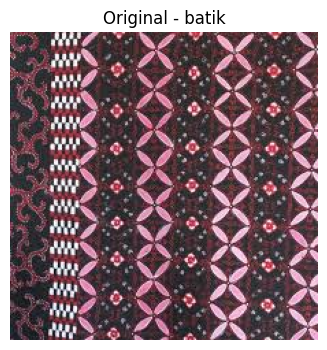


=== ORANGE ===
Path: /content/STA1381-PSD/SESI UAS/image-data/orange.jpeg
Shape: (219, 230, 3)
Sample pixel matrix:
[[[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]]


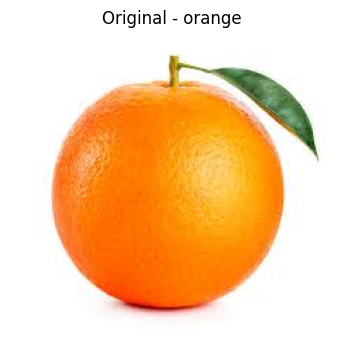


=== RABBIT ===
Path: /content/STA1381-PSD/SESI UAS/image-data/rabbit.webp
Shape: (784, 719, 3)
Sample pixel matrix:
[[[238 238 238]
  [238 238 238]
  [238 238 238]]

 [[238 238 238]
  [238 238 238]
  [238 238 238]]

 [[238 238 238]
  [238 238 238]
  [238 238 238]]]


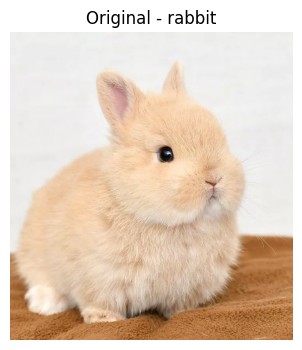

In [36]:
# STEP 1: Read all images
images_rgb = {}

for label, fname in image_files.items():
    img_bgr = cv2.imread(base_path + fname)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    images_rgb[label] = img_rgb

    print(f"\n=== {label.upper()} ===")
    print("Path:", base_path + fname)
    print("Shape:", img_rgb.shape)
    print("Sample pixel matrix:")
    print(img_rgb[:3, :3, :])   # tampilkan 3x3 pixel

    plt.imshow(img_rgb)
    plt.title(f"Original - {label}")
    plt.axis('off')
    plt.show()

Kode di atas membaca seluruh gambar dari folder image-data berdasarkan daftar file yang telah didefinisikan. Setiap citra dibuka menggunakan OpenCV, dikonversi dari format BGR ke RGB, lalu disimpan ke dalam dictionary images_rgb untuk digunakan pada tahap berikutnya. Program juga menampilkan informasi dasar setiap gambar, seperti path, ukuran citra, serta contoh nilai piksel 3×3, dan menampilkan visualisasi gambar aslinya menggunakan Matplotlib.

In [37]:
# STEP 2: Preprocessing function

def preprocess_image(img_rgb, size=(256,256)):
    # Resize
    resized = cv2.resize(img_rgb, size)

    # Grayscale
    gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)

    # Normalization (0–1)
    norm = gray / 255.0

    # Noise Reduction (Gaussian Blur)
    blur = cv2.GaussianBlur(norm, (5,5), 0)

    return {
        "resized_rgb": resized,
        "gray": gray,
        "norm": norm,
        "blur": blur
    }

Kode di atas membuat fungsi preprocessing untuk menyiapkan gambar sebelum dianalisis. Setiap citra di-resize ke ukuran seragam, dikonversi menjadi grayscale, dinormalisasi agar nilai piksel berada pada rentang 0–1, dan kemudian dilembutkan menggunakan Gaussian Blur untuk mengurangi noise. Hasil dari setiap tahap dikembalikan dalam bentuk dictionary agar dapat digunakan pada proses ekstraksi fitur berikutnya.


=== PREPROCESSING RESULT for CAT ===
Gray shape: (256, 256)
Normalized min/max: 0.03529411764705882 1.0


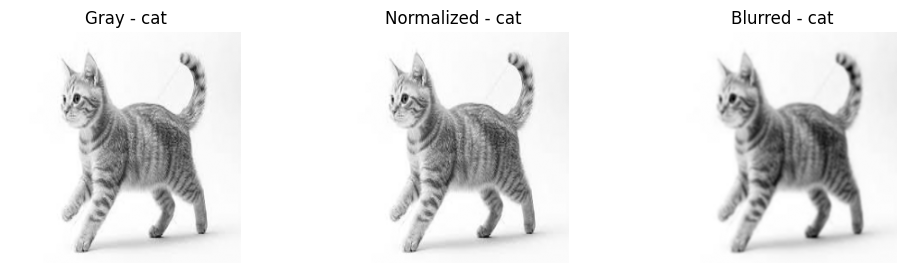


=== PREPROCESSING RESULT for BANANA ===
Gray shape: (256, 256)
Normalized min/max: 0.1450980392156863 1.0


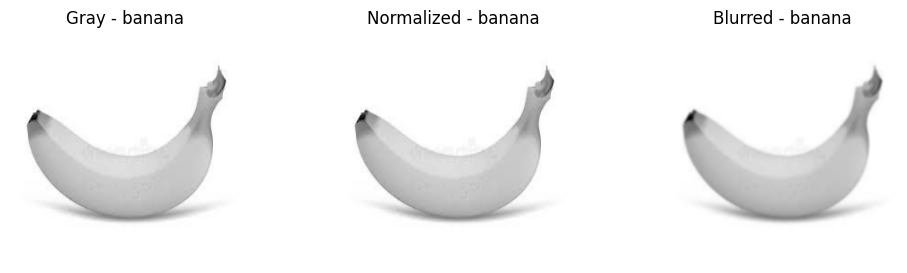


=== PREPROCESSING RESULT for BATIK ===
Gray shape: (256, 256)
Normalized min/max: 0.06666666666666667 0.996078431372549


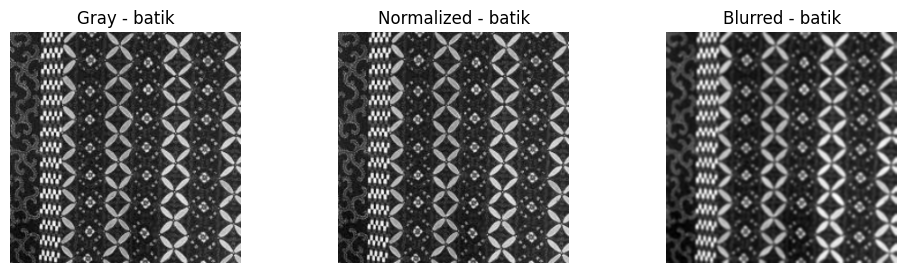


=== PREPROCESSING RESULT for ORANGE ===
Gray shape: (256, 256)
Normalized min/max: 0.14901960784313725 1.0


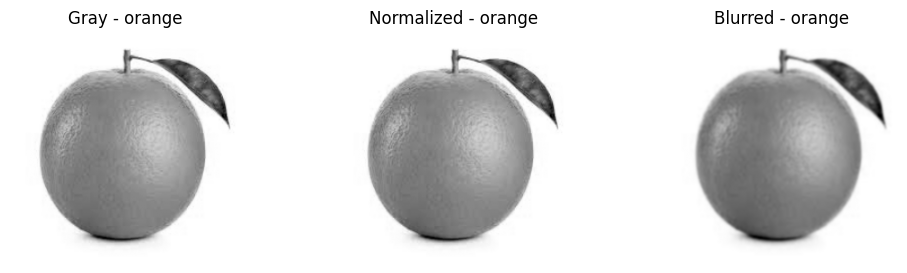


=== PREPROCESSING RESULT for RABBIT ===
Gray shape: (256, 256)
Normalized min/max: 0.01568627450980392 0.9882352941176471


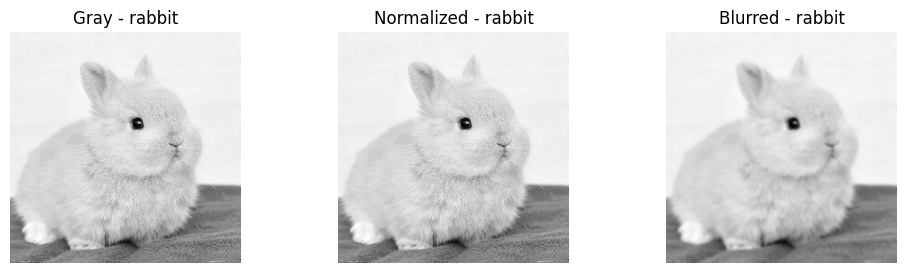

In [38]:
# STEP 2b: Apply preprocessing to ALL images

preprocessed = {}

for label, img in images_rgb.items():
    preprocessed[label] = preprocess_image(img)

    gray = preprocessed[label]["gray"]
    norm = preprocessed[label]["norm"]
    blur = preprocessed[label]["blur"]

    print(f"\n=== PREPROCESSING RESULT for {label.upper()} ===")
    print("Gray shape:", gray.shape)
    print("Normalized min/max:", norm.min(), norm.max())

    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1); plt.imshow(gray, cmap='gray'); plt.title(f"Gray - {label}"); plt.axis('off')
    plt.subplot(1,3,2); plt.imshow(norm, cmap='gray'); plt.title(f"Normalized - {label}"); plt.axis('off')
    plt.subplot(1,3,3); plt.imshow(blur, cmap='gray'); plt.title(f"Blurred - {label}"); plt.axis('off')
    plt.show()

Kode di atas menjalankan proses preprocessing untuk seluruh gambar yang sudah dibaca sebelumnya. Setiap gambar diproses menggunakan fungsi preprocess_image, lalu hasilnya disimpan dalam dictionary preprocessed. Program menampilkan informasi dasar dari hasil preprocessing, seperti ukuran citra grayscale serta rentang nilai setelah normalisasi. Selain itu, tiga tahapan utama: grayscale, normalisasi, dan smoothing menggunakan Gaussian Blur yg ditampilkan berdampingan untuk memvisualisasikan perubahan citra pada setiap langkah.

In [39]:
print("Before blur min/max:", norm.min(), norm.max())
print("After blur  min/max:", blur.min(), blur.max())

Before blur min/max: 0.01568627450980392 0.9882352941176471
After blur  min/max: 0.050474877450980386 0.9785232843137255


Kode di atas menampilkan perbandingan rentang nilai piksel sebelum dan sesudah proses Gaussian Blur. Baris pertama mencetak nilai minimum dan maksimum dari citra yang telah dinormalisasi, sedangkan baris kedua menunjukkan rentang nilai setelah dilakukan smoothing. Perbandingan ini membantu memastikan bahwa proses blur tidak mengubah skala intensitas secara ekstrem, melainkan hanya meratakan variasi piksel untuk mengurangi noise.

In [40]:
print("Normalized sample:\n", norm[100:105, 100:105])
print("Blurred sample:\n", blur[100:105, 100:105])

Normalized sample:
 [[0.87058824 0.85882353 0.85490196 0.83921569 0.84313725]
 [0.87058824 0.8627451  0.85882353 0.82745098 0.84705882]
 [0.8745098  0.85882353 0.84705882 0.83921569 0.83921569]
 [0.85882353 0.85098039 0.85490196 0.80392157 0.76862745]
 [0.85490196 0.84313725 0.84313725 0.81176471 0.81176471]]
Blurred sample:
 [[0.87028186 0.86651348 0.86078431 0.85595895 0.85507047]
 [0.86905637 0.86170343 0.85220588 0.84431679 0.84208027]
 [0.86744792 0.85787377 0.84586397 0.83399203 0.82809436]
 [0.86288297 0.8528799  0.84004289 0.82533701 0.81675858]
 [0.85689338 0.84820772 0.83765319 0.82608762 0.82077206]]


Kode di atas menampilkan cuplikan kecil nilai piksel dari citra yang telah dinormalisasi serta versi yang sudah diberi Gaussian Blur. Dengan mencetak sebagian kecil matriks piksel tersebut, pengguna dapat melihat secara langsung bagaimana proses blur menghaluskan nilai intensitas, membuat transisi antar piksel menjadi lebih lembut dibandingkan citra yang hanya dinormalisasi.

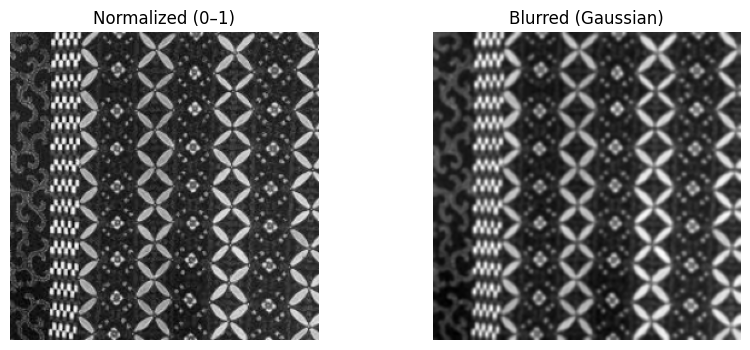

In [23]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(norm, cmap='gray'); plt.title("Normalized (0–1)"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(blur, cmap='gray'); plt.title("Blurred (Gaussian)"); plt.axis('off')
plt.show()

Kode di atas menampilkan perbandingan visual antara citra yang telah dinormalisasi dan citra hasil Gaussian Blur. Kedua gambar ditampilkan berdampingan agar perbedaan tingkat kehalusan dan pengurangan noise lebih mudah diamati sebelum melanjutkan ke tahap ekstraksi fitur.

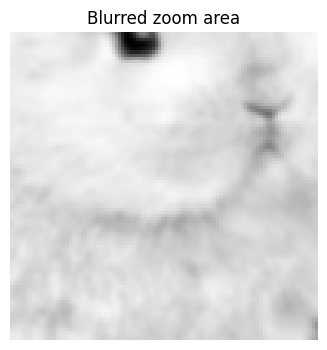

In [41]:
plt.imshow(blur[100:200, 100:200], cmap='gray')
plt.title("Blurred zoom area")
plt.axis('off')
plt.show()

Kode di atas menampilkan area tertentu dari citra yang telah melalui proses Gaussian Blur, yaitu potongan piksel pada koordinat baris 100–200 dan kolom 100–200. Tampilan zoom ini membantu memperjelas efek smoothing pada detail lokal gambar, sehingga perubahan tekstur akibat blur dapat diamati lebih dekat.

Feature vector length (cat): 65642
First 20 features: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


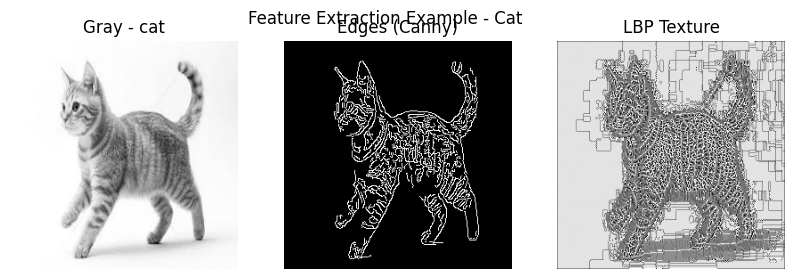

In [42]:
# STEP 3: Feature extraction function
# - Edge (Canny) -> flatten
# - Texture (LBP) -> histogram
# - Color histogram (RGB) -> 32 bins per channel

def extract_features(img_rgb):
    # Preprocess dulu
    prep = preprocess_image(img_rgb)
    gray = prep["gray"]
    resized_rgb = prep["resized_rgb"]

    # 1) Edge features (Canny)
    edges = cv2.Canny(gray, 100, 200)  # 0/255
    edge_vector = edges.flatten().astype(np.float32) / 255.0  # skala 0-1

    # 2) Texture features (LBP)
    lbp = local_binary_pattern(gray, P=8, R=1, method='uniform')
    # histogram LBP
    n_bins = int(lbp.max() + 1)
    lbp_hist, _ = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density=True)

    # 3) Color histogram (RGB)
    chans = cv2.split(resized_rgb)
    color_hists = []
    for chan in chans:
        hist = cv2.calcHist([chan], [0], None, [32], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        color_hists.append(hist)
    color_feature = np.concatenate(color_hists)

    # Gabungkan semua fitur menjadi satu vektor
    feature_vector = np.concatenate([edge_vector, lbp_hist, color_feature])

    return {
        "prep": prep,
        "edges": edges,
        "lbp": lbp,
        "feature_vector": feature_vector
    }

# Demo feature extraction untuk kucing
demo = extract_features(images_rgb["cat"])

print("Feature vector length (cat):", len(demo["feature_vector"]))
print("First 20 features:", demo["feature_vector"][:20])

plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.imshow(demo["prep"]["gray"], cmap='gray')
plt.title("Gray - cat")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(demo["edges"], cmap='gray')
plt.title("Edges (Canny)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(demo["lbp"], cmap='gray')
plt.title("LBP Texture")
plt.axis('off')

plt.suptitle("Feature Extraction Example - Cat")
plt.show()

Kode di atas mendefinisikan fungsi ekstraksi fitur dari sebuah citra dengan tiga jenis informasi: tepi, tekstur, dan warna. Pertama, gambar diproses terlebih dahulu menjadi grayscale dan di-resize. Fitur tepi diambil menggunakan algoritma Canny dan diratakan menjadi vektor numerik. Tekstur dihitung menggunakan Local Binary Pattern (LBP) dan diringkas dalam bentuk histogram. Untuk fitur warna, setiap kanal RGB dibuatkan histogram dengan 32 bins dan dinormalisasi. Semua komponen ini kemudian digabung menjadi satu vektor fitur lengkap. Setelah itu, contoh ekstraksi fitur ditunjukkan pada gambar kucing, termasuk menampilkan citra grayscale, hasil deteksi tepi, dan peta tekstur LBP, serta mencetak sebagian dari nilai vektor fiturnya.

In [43]:
# STEP 4: Build feature table (structured data)

feature_list = []
labels = []

for label, img_rgb in images_rgb.items():
    result = extract_features(img_rgb)
    fv = result["feature_vector"]
    feature_list.append(fv)
    labels.append(label)

X = np.vstack(feature_list)  # shape: (n_images, n_features)
y = np.array(labels)

print("X shape (n_samples, n_features):", X.shape)
print("y:", y)

# Buat DataFrame (kolom diberi nama f1, f2, dst)
feature_names = [f"f{i+1}" for i in range(X.shape[1])]
df_features = pd.DataFrame(X, columns=feature_names)
df_features["label"] = y

df_features.head()

X shape (n_samples, n_features): (5, 65642)
y: ['cat' 'banana' 'batik' 'orange' 'rabbit']


f1   f2   f3   f4   f5   f6   f7   f8   f9  f10  ...    f65634    f65635  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.013168  0.014192   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.003696  0.003287   
2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...  0.061027  0.061078   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.004539  0.004625   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.143443  0.064778   

     f65636    f65637    f65638    f65639    f65640    f65641    f65642  \
0  0.014460  0.019337  0.019337  0.020020  0.024824  0.063621  0.992208   
1  0.003803  0.004727  0.005028  0.006553  0.009583  0.024945  0.995288   
2  0.055942  0.048288  0.039829  0.024522  0.014955  0.012236  0.011581   
3  0.005135  0.005759  0.006582  0.010129  0.015604  0.038216  0.904361   
4  0.025215  0.018712  0.018628  0.047786  0.850797  0.139289  0.000000   

    label  
0     cat  
1  banana  
2   batik  
3  orange  
4  rabbit  

[5 rows x 65643 columns]

Kode di atas membangun tabel fitur terstruktur dengan mengekstraksi vektor fitur dari setiap gambar dan mengumpulkannya ke dalam bentuk matriks. Setiap vektor fitur dimasukkan ke dalam list, sementara label gambar disimpan terpisah. Setelah semua diproses, seluruh fitur digabung menjadi array dua dimensi X, dan labelnya menjadi array y. Data tersebut kemudian dikonversi ke dalam DataFrame dengan nama kolom berurutan (f1, f2, dan seterusnya), serta ditambahkan kolom label untuk menandai kategori masing-masing gambar. Hasil akhirnya ditampilkan melalui lima baris pertama DataFrame.

In [44]:
# STEP 5: Simple KNN classification (just for illustration)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

y_pred = knn.predict(X)

print("True labels:     ", y)
print("Predicted labels:", y_pred)

True labels:      ['cat' 'banana' 'batik' 'orange' 'rabbit']
Predicted labels: ['cat' 'banana' 'batik' 'orange' 'rabbit']


Kode di atas menjalankan contoh sederhana klasifikasi menggunakan algoritma K-Nearest Neighbors dengan k = 1. Model KNN dilatih menggunakan seluruh vektor fitur (X) dan label gambar (y), lalu langsung memprediksi kembali data yang sama untuk melihat kemampuan model mengenali tiap citra berdasarkan fitur yang diekstraksi. Hasil label asli dan label prediksi kemudian dicetak untuk dibandingkan.

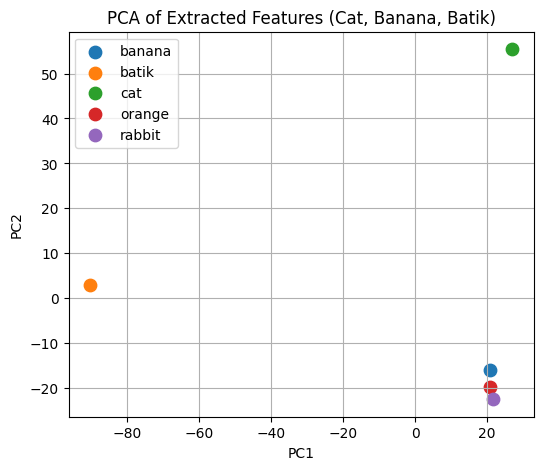

In [45]:
# STEP 6: PCA 2D visualization

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

plt.figure(figsize=(6,5))
for label in np.unique(y):
    idx = (y == label)
    plt.scatter(X_2d[idx, 0], X_2d[idx, 1], label=label, s=80)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Extracted Features (Cat, Banana, Batik)")
plt.legend()
plt.grid(True)
plt.show()

Kode di atas menggunakan PCA untuk mereduksi dimensi seluruh vektor fitur ke dalam dua komponen utama sehingga data dapat divisualisasikan dalam bidang 2D. Setiap kelompok label ditampilkan sebagai titik-titik dalam warna berbeda, sehingga hubungan dan pemisahan antar kategori gambar dapat diamati dengan lebih jelas. Plot ini membantu melihat apakah fitur yang diekstraksi mampu membedakan objek berdasarkan struktur dan distribusinya di ruang fitur.

In [29]:
# STEP 3: Feature extraction function
# - Edge (Canny) -> flatten
# - Texture (LBP) -> histogram
# - Color histogram (RGB) -> 32 bins per channel

def extract_features(img_rgb):
    # Preprocess dulu
    prep = preprocess_image(img_rgb)
    gray = prep["gray"]
    resized_rgb = prep["resized_rgb"]

    # 1) Edge features (Canny)
    edges = cv2.Canny(gray, 100, 200)  # 0/255
    edge_vector = edges.flatten().astype(np.float32) / 255.0  # skala 0-1

    # 2) Texture features (LBP)
    lbp = local_binary_pattern(gray, P=8, R=1, method='uniform')
    # histogram LBP
    n_bins = int(lbp.max() + 1)
    lbp_hist, _ = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density=True)

    # 3) Color histogram (RGB)
    chans = cv2.split(resized_rgb)
    color_hists = []
    for chan in chans:
        hist = cv2.calcHist([chan], [0], None, [32], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        color_hists.append(hist)
    color_feature = np.concatenate(color_hists)

    # Gabungkan semua fitur menjadi satu vektor
    feature_vector = np.concatenate([edge_vector, lbp_hist, color_feature])

    return {
        "prep": prep,
        "edges": edges,
        "lbp": lbp,
        "feature_vector": feature_vector
    }

Kode di atas membangun sebuah fungsi yang bertugas mengekstraksi tiga kelompok fitur penting dari sebuah gambar. Setelah gambar melalui tahap preprocessing, informasi bentuk ditangkap melalui deteksi tepi Canny yang kemudian diratakan menjadi vektor numerik. Karakteristik tekstur dihitung menggunakan Local Binary Pattern dan diringkas dalam bentuk histogram yang merepresentasikan pola-pola lokal pada citra. Sementara itu, informasi warna diekstraksi dari histogram tiap kanal RGB menggunakan 32 bins untuk merangkum distribusi intensitas warna. Ketiga bagian fitur ini digabungkan menjadi satu vektor fitur komprehensif yang merepresentasikan struktur, tekstur, dan warna gambar, lalu dikembalikan bersama output tambahan seperti hasil preprocessing, peta tepi, dan peta LBP.

In [30]:
# STEP 3b: Apply extract_features to ALL images

features_dict = {}   # simpan hasil per gambar

for label, img_rgb in images_rgb.items():
    res = extract_features(img_rgb)
    features_dict[label] = res

    fv = res["feature_vector"]
    print(f"\n=== {label.upper()} ===")
    print("Feature vector length:", len(fv))
    print("First 20 features:", fv[:20])


=== CAT ===
Feature vector length: 65642
First 20 features: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

=== BANANA ===
Feature vector length: 65642
First 20 features: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

=== BATIK ===
Feature vector length: 65642
First 20 features: [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]


Kode di atas menjalankan proses ekstraksi fitur untuk seluruh gambar yang tersedia. Setiap gambar diproses dengan fungsi extract_features, lalu hasil lengkapnya, termasuk preprocessing, peta tepi, LBP, dan vektor fiturnya, lalu disimpan dalam sebuah dictionary. Untuk tiap gambar, kode menampilkan panjang vektor fitur beserta cuplikan 20 nilai awalnya. Dengan langkah ini, seluruh citra telah diubah menjadi representasi numerik yang siap digunakan untuk analisis lebih lanjut atau pemodelan.

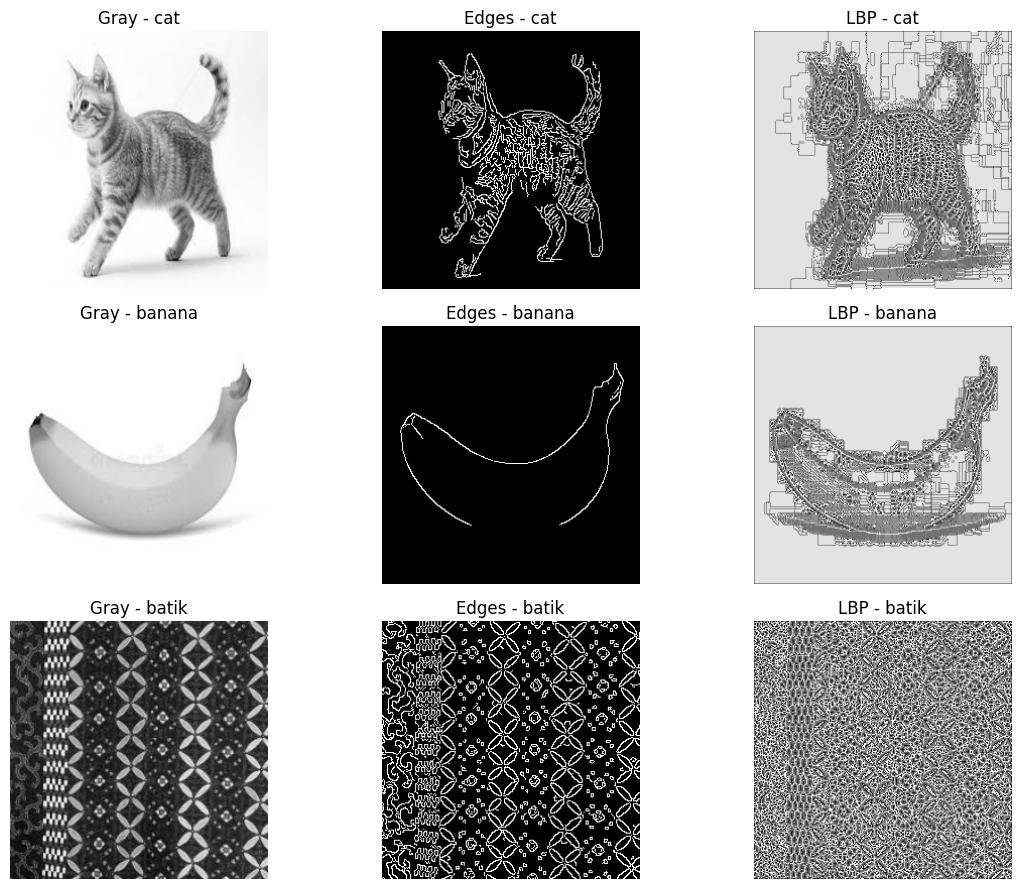

In [31]:
plt.figure(figsize=(12,9))

labels = list(features_dict.keys())

for i, label in enumerate(labels):
    res = features_dict[label]

    plt.subplot(len(labels), 3, 3*i + 1)
    plt.imshow(res["prep"]["gray"], cmap='gray')
    plt.title(f"Gray - {label}")
    plt.axis('off')

    plt.subplot(len(labels), 3, 3*i + 2)
    plt.imshow(res["edges"], cmap='gray')
    plt.title(f"Edges - {label}")
    plt.axis('off')

    plt.subplot(len(labels), 3, 3*i + 3)
    plt.imshow(res["lbp"], cmap='gray')
    plt.title(f"LBP - {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Kode di atas menampilkan rangkaian visualisasi untuk setiap gambar setelah proses ekstraksi fitur. Untuk tiap label, ditampilkan tiga panel: citra grayscale hasil preprocessing, peta tepi dari Canny, dan citra tekstur dari LBP. Seluruhnya disusun dalam grid agar mudah dibandingkan antar gambar. Dengan tampilan ini, perbedaan karakteristik visual tiap objek—baik bentuk, kontur, maupun pola tekstur—dapat diamati secara langsung sebelum masuk ke analisis numerik.

In [32]:
feature_list = []
labels = []

for label, res in features_dict.items():
    feature_list.append(res["feature_vector"])
    labels.append(label)

X = np.vstack(feature_list)
y = np.array(labels)

print("X shape:", X.shape)
print("y:", y)

X shape: (3, 65642)
y: ['cat' 'banana' 'batik']


Kode di atas menyusun seluruh vektor fitur menjadi satu matriks data terstruktur. Setiap hasil ekstraksi dari features_dict dimasukkan ke dalam feature_list, sementara labelnya disimpan di labels. Setelah itu, seluruh vektor digabung menggunakan vstack sehingga membentuk matriks X dengan ukuran (jumlah_gambar × jumlah_fitur), dan label dibuat sebagai array y. Output ini memastikan bahwa data sudah siap dipakai untuk pemodelan maupun analisis selanjutnya.

In [33]:
# STEP 4: Build feature table (structured data)

feature_list = []
labels = []

for label, img_rgb in images_rgb.items():
    result = extract_features(img_rgb)
    fv = result["feature_vector"]
    feature_list.append(fv)
    labels.append(label)

X = np.vstack(feature_list)  # shape: (n_images, n_features)
y = np.array(labels)

print("X shape (n_samples, n_features):", X.shape)
print("y:", y)

# Buat DataFrame penuh di Python
feature_names = [f"f{i+1}" for i in range(X.shape[1])]
df_features = pd.DataFrame(X, columns=feature_names)
df_features["label"] = y

print("\nDataFrame full (hanya ditampilkan 5 kolom pertama):")
display(df_features.iloc[:, :5].head())

# ==== SIMPAN KE EXCEL: HANYA SEBAGIAN FITUR ====

# misal: hanya simpan 1000 fitur pertama + label
max_features_to_export = 1000

n_features_actual = X.shape[1]
n_export = min(max_features_to_export, n_features_actual)

export_feature_cols = [f"f{i+1}" for i in range(n_export)]

df_export = df_features[export_feature_cols + ["label"]]

print("\nShape df_export (untuk Excel):", df_export.shape)

output_path = "image_features_cat_banana_batik.xlsx"
df_export.to_excel(output_path, index=False)

print("File Excel tersimpan di:", output_path)

X shape (n_samples, n_features): (3, 65642)
y: ['cat' 'banana' 'batik']

DataFrame full (hanya ditampilkan 5 kolom pertama):


f1   f2   f3   f4   f5
0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0


Shape df_export (untuk Excel): (3, 1001)
File Excel tersimpan di: image_features_cat_banana_batik.xlsx


Kode di atas menyusun seluruh fitur menjadi tabel terstruktur, lalu mengekspor sebagian besar fitur ke file Excel agar lebih ringan dan mudah dibaca. Setiap gambar diekstraksi ulang melalui extract_features, lalu vektornya dikumpulkan ke dalam X, sementara labelnya disimpan di y. Seluruh fitur kemudian diberi nama f1, f2, f3, dan seterusnya, sebelum dibuat DataFrame lengkap. Untuk keperluan ekspor, hanya 1000 fitur pertama yang diambil agar ukuran file tidak berlebihan, lalu ditambahkan label sebagai kolom terakhir. Data ringkas ini akhirnya disimpan sebagai file Excel sehingga dapat digunakan untuk analisis lebih lanjut atau pelaporan.

# Kesimpulan

Komputer membaca gambar bukan sebagai “gambar”, melainkan sebagai matriks angka. Setiap piksel memiliki nilai intensitas (0–255) untuk tiap kanal warna (R, G, B). Setelah diproses—di‐resize, dinormalisasi, diambil tepi, tekstur, hingga histogram warna—gambar berubah menjadi vektor fitur panjang berisi ribuan angka yang menggambarkan bentuk, pola, dan warna.

# Pertanyaan

### 1. Apakah semua gambar memiliki dimensi sama? Mengapa perlu diseragamkan?

Tidak. Gambar asli bisa memiliki ukuran berbeda.
Karena model hanya bisa menerima input vektor dengan panjang konsisten, maka semua gambar harus di‐resize ke ukuran yang sama (misalnya 256×256).
Kalau tidak diseragamkan, jumlah piksel tiap gambar berbeda, maka akan berakibat panjang fitur berbeda sehinggamodel tidak bisa membandingkan.

### 2. Mengapa normalisasi penting?

Normalisasi (skala 0–1) membuat fitur setara besarannya.
Tanpa normalisasi:
*   piksel 0–255 (besar)
*   histogram 0–1 (kecil)
*   LBP histogram juga kecil
*   tepi hasil Canny 0 atau 255 (besar)

Jika tidak dinormalisasi, fitur tertentu akan mendominasi hanya karena skalanya besar, bukan karena informasinya penting.
Normalisasi memastikan semua fitur kontribusinya seimbang saat clustering/KNN.

### 3. Mengapa batik memiliki fitur tekstur paling unik?

Karena batik punya pola berulang yang sangat kompleks, berbeda dari objek jelas seperti kucing atau pisang.

Akibatnya:
*   LBP menghasilkan variasi pola yang lebih banyak
*   Histogram LBP-nya lebih menyebar, tidak monoton seperti objek dengan tekstur halus
*   Edge map batik memiliki jumlah tepi jauh lebih banyak

Inilah alasan batik sangat mudah dipisahkan dalam PCA karena fitur teksturnya kaya dan unik.

### 4. Bagaimana gambar direpresentasikan sebagai ribuan angka?

Ketika gambar diproses, komputer tidak melihat bentuk atau objek seperti manusia. Semua pikselnya diubah menjadi angka—baik nilai warna, tekstur, maupun tepi. Setelah preprocessing, setiap gambar berubah menjadi ribuan nilai numerik yang mewakili karakteristik visualnya. Inilah cara komputer “melihat”. Bukan gambar, tapi deretan angka yang panjang.

### 5. Mengapa model mudah benar dalam dataset kecil?

Karena datanya sangat sedikit, model tidak benar-benar belajar pola, tetapi hanya menghafal. Terlebih KNN dengan k=1 akan selalu menemukan gambar yang sama sebagai tetangga terdekat. Jadi hasilnya terlihat akurat, padahal sebenarnya model hanya mengenali data yang sudah pernah dilihat, bukan kemampuan generalisasi yang sesungguhnya.

### 6. Mengapa orange muncul dekat banana di PCA?

Karena fitur warnanya sangat mirip:
*   Banana: kuning → campuran R tinggi + G tinggi
*   Orange: jingga → R tinggi + G sedang
*   Keduanya punya pola tepi sederhana
*   Tekstur sama‐sama halus
*   Histogram warna RGB mendekati

PCA menempatkan data yang memiliki kemiripan warna + tekstur ke posisi yang berdekatan.
Karena fitur batik dominan tekstur, orange–banana otomatis berada pada cluster “warna buah”.